### Glossary 
<br>

`Year` -- Year at time of season finale <br>
`Age` -- Player age at time of finale <br>
`Pos` -- Player position <br>
`GP` -- Number of Games Played in season <br>
`G` -- Goals <br>
`A` -- Assists <br>
`PTS` -- Points <br>
`PTS/g` -- Points per Game<br>
`PS` -- Point Shares; an estimate of the number of points contributed by a player. <br>
`PPG` -- Power Play Goals <br>
`PPA` -- Power Play Assists <br>
`Shots` -- Shots on Goal <br>
`S%` -- Shooting Percentage (total goals / total shots on goal) <br>
`TOI` -- Total Time on Ice (in minutes) <br>
`ATOI` -- Average Time on Ice per game <br>

## What is my business question?
#### More of a business challenge...
<br>

##### I am hired by an NHL stats company to develop a model that will help people (the user) to `predict Goals and Assists of any given player for the upcoming NHL season`.

- revenue is driven by subscriptions to access our predictive model --> the better the model, the better our reputation, the more subscribers(users) we gain
- The user may be using this for their own personal interest, for Fantasy Hockey purposes, or for sports gambling
  - Gambling --> Can place bets on season-long results
    - Could my model be adapted in the future to predict game-by-game outcomes?
        
## What direction do I want to take?
<br>

- Can I `predict how many Goals and Assists player x will have in his next season` (pro-rated to 82 games)?
    - What metrics will I use? --> for sure I will include
        - Goals(G)
        - Assists(A)
        - Games Played(GP)
        - Points per Game(PTS/g)
        - Power Play Goals(PPG)
        - Power Play Assists(PPA)
        - Shooting Percentage(S%)
        - Time on Ice(TOI)
        - Goals per 60(G/60)
        - Assists per 60(A/60)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind
import glob
import plotly.express as px
import plotly.graph_objects as go

In [2]:
sns.__version__


'0.12.2'

We are going to add a 'Year' column to each .csv file (each season's data) one-by-one before compiling them all into one large dataframe. <br>


In [3]:
# # Reading csv file
# nhl2006= pd.read_csv("C:/Users/joshm/Documents/BrainStation/Capstone Project/hockey-reference.com data/nhl2006.csv", index_col=1)

# # Inserting a new 'Year' column into df
# nhl2006.insert(loc=1, column='Year', value=2006)

# # saving our modified .csv file
# nhl2006.to_csv("C:/Users/joshm/Documents/BrainStation/Capstone Project/hockey-reference.com data/nhl2006.csv")

In [4]:
# # Sort by any column
# sorted_nhl2018 = nhl2018.sort_values(by='G', ascending=False)
# sorted_nhl2018.head(30)

In [5]:
# # applying a filter (in this case gp >= 30) and then sorting.
# filtered_nhl23 = nhl23[nhl23['GP'] >= 30]
# filtered_nhl23.sort_values(by='Age', ascending=True).head(30)

In [6]:
# Combining multiple .csv files into one dataframe

# Get a list of all CSV files in the directory
csv_files = glob.glob("C:/Users/joshm/Documents/BrainStation/Capstone Project/hockey-reference.com data/*.csv")

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each CSV file
for csv_file in csv_files:
    # Read the CSV file into a DataFrame
    combined_df = pd.read_csv(csv_file, index_col=1)
    # Append the DataFrame to the list
    dfs.append(combined_df)

# Concatenate all DataFrames in the list into one DataFrame
nhl_df = pd.concat(dfs, ignore_index=True)

nhl_df.head(50)

,Player,Year,Age,Tm,Pos,GP,G,A,PTS,+/-,...,S,S%,TOI,ATOI,-9999,BLK,HIT,FOW,FOL,FO%
0,Joe Thornton,2006,26.0,TOT,C,81,29,96,125,31,...,195,14.9,1728,21:20,thornjo01,NaN,NaN,NaN,NaN,NaN
1,Jaromír Jágr,2006,33.0,NYR,RW,82,54,69,123,34,...,368,14.7,1810,22:05,jagrja01,NaN,NaN,NaN,NaN,NaN
2,Alex Ovechkin,2006,20.0,WSH,LW,81,52,54,106,2,...,425,12.2,1751,21:37,ovechal01,NaN,NaN,NaN,NaN,NaN
3,Daniel Alfredsson*,2006,33.0,OTT,RW,77,43,60,103,29,...,249,17.3,1670,21:41,alfreda01,NaN,NaN,NaN,NaN,NaN
4,Dany Heatley,2006,25.0,OTT,LW,82,50,53,103,29,...,300,16.7,1734,21:09,heatlda01,NaN,NaN,NaN,NaN,NaN
5,Sidney Crosby,2006,18.0,PIT,C,81,39,63,102,-1,...,278,14.0,1630,20:08,crosbsi01,NaN,NaN,NaN,NaN,NaN
6,Eric Staal,2006,21.0,CAR,C,82,45,55,100,-8,...,279,16.1,1611,19:39,staaler01,NaN,NaN,NaN,NaN,NaN
7,Ilya Kovalchuk,2006,22.0,ATL,LW,78,52,46,98,-6,...,323,16.1,1731,22:11,kovalil01,NaN,NaN,NaN,NaN,NaN
8,Marc Savard,2006,28.0,ATL,C,82,28,69,97,7,...,212,13.2,1682,20:30,savarma01,NaN,NaN,NaN,NaN,NaN
9,Jonathan Cheechoo,2006,25.0,SJS,RW,82,56,37,93,23,...,317,17.7,1637,19:57,cheecjo01,NaN,NaN,NaN,NaN,NaN


In [7]:
nhl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16937 entries, 0 to 16936
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  16937 non-null  object 
 1   Year    16937 non-null  int64  
 2   Age     16935 non-null  float64
 3   Tm      16937 non-null  object 
 4   Pos     16937 non-null  object 
 5   GP      16937 non-null  int64  
 6   G       16937 non-null  int64  
 7   A       16937 non-null  int64  
 8   PTS     16937 non-null  int64  
 9   +/-     16937 non-null  int64  
 10  PIM     16937 non-null  int64  
 11  PS      16937 non-null  float64
 12  EV      16937 non-null  int64  
 13  PP      16937 non-null  int64  
 14  SH      16937 non-null  int64  
 15  GW      16937 non-null  int64  
 16  EV.1    16937 non-null  int64  
 17  PP.1    16937 non-null  int64  
 18  SH.1    16937 non-null  int64  
 19  S       16937 non-null  int64  
 20  S%      16430 non-null  float64
 21  TOI     16937 non-null  int64  
 22

In [8]:
# Dropping unwanted columns
nhl_df.drop(columns=['Tm','Pos','+/-','PIM','EV','SH','GW','EV.1','SH.1','BLK','HIT','FOW','FOL','FO%','ATOI','-9999'], inplace=True)
nhl_df

,Player,Year,Age,GP,G,A,PTS,PS,PP,PP.1,S,S%,TOI
0,Joe Thornton,2006,26.0,81,29,96,125,13.3,11,40,195,14.9,1728
1,Jaromír Jágr,2006,33.0,82,54,69,123,15.5,24,28,368,14.7,1810
2,Alex Ovechkin,2006,20.0,81,52,54,106,12.7,21,31,425,12.2,1751
3,Daniel Alfredsson*,2006,33.0,77,43,60,103,12.3,16,32,249,17.3,1670
4,Dany Heatley,2006,25.0,82,50,53,103,12.9,23,20,300,16.7,1734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16932,Chris Wagner,2024,32.0,4,0,0,0,0.0,0,0,2,0.0,28
16933,Samuel Walker,2024,24.0,4,0,0,0,-0.2,0,0,3,0.0,37
16934,Colin White,2024,27.0,13,0,0,0,-0.3,0,0,10,0.0,131
16935,Ryan Winterton,2024,20.0,3,0,0,0,-0.1,0,0,1,0.0,25


In [9]:
# Renaming some columns
nhl_df.rename(columns={'PS':'PtSh','PP':'PPG','PP.1':'PPA', 'S':'Shots', '-9999':'PlayerID'}, inplace=True)
nhl_df

,Player,Year,Age,GP,G,A,PTS,PtSh,PPG,PPA,Shots,S%,TOI
0,Joe Thornton,2006,26.0,81,29,96,125,13.3,11,40,195,14.9,1728
1,Jaromír Jágr,2006,33.0,82,54,69,123,15.5,24,28,368,14.7,1810
2,Alex Ovechkin,2006,20.0,81,52,54,106,12.7,21,31,425,12.2,1751
3,Daniel Alfredsson*,2006,33.0,77,43,60,103,12.3,16,32,249,17.3,1670
4,Dany Heatley,2006,25.0,82,50,53,103,12.9,23,20,300,16.7,1734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16932,Chris Wagner,2024,32.0,4,0,0,0,0.0,0,0,2,0.0,28
16933,Samuel Walker,2024,24.0,4,0,0,0,-0.2,0,0,3,0.0,37
16934,Colin White,2024,27.0,13,0,0,0,-0.3,0,0,10,0.0,131
16935,Ryan Winterton,2024,20.0,3,0,0,0,-0.1,0,0,1,0.0,25


In [10]:
# What about null values?

nhl_df.isnull().sum()

Player      0
Year        0
Age         2
GP          0
G           0
A           0
PTS         0
PtSh        0
PPG         0
PPA         0
Shots       0
S%        507
TOI         0
dtype: int64

In [11]:
rows_with_null_age = nhl_df[nhl_df['Age'].isnull()]
rows_with_null_age

,Player,Year,Age,GP,G,A,PTS,PtSh,PPG,PPA,Shots,S%,TOI
15927,Jake Livingstone,2023,NaN,5,0,1,1,0.1,0,0,3,0.0,77
15988,Elliot Desnoyers,2023,NaN,4,0,0,0,-0.2,0,0,3,0.0,53


In [12]:
# Looking at the rows that have Null values in the shooting percentage column
rows_with_null_SPerc = nhl_df[nhl_df['S%'].isnull()].sort_values(by='GP', ascending=False)
rows_with_null_SPerc 

,Player,Year,Age,GP,G,A,PTS,PtSh,PPG,PPA,Shots,S%,TOI
6074,Steve MacIntyre,2012,31.0,12,0,0,0,-0.1,0,0,0,NaN,38
1541,Nate Guenin,2007,24.0,9,0,2,2,0.3,0,0,0,NaN,78
1677,Dan LaCouture,2007,29.0,6,0,0,0,0.0,0,0,0,NaN,30
1681,Reed Low,2007,30.0,6,0,0,0,-0.1,0,0,0,NaN,21
9616,Brad Stuart,2016,36.0,6,0,0,0,-0.1,0,0,0,NaN,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6951,Andy Miele,2013,24.0,1,0,0,0,0.0,0,0,0,NaN,9
6950,Steve MacIntyre,2013,32.0,1,0,0,0,0.0,0,0,0,NaN,5
6948,Shawn Lalonde,2013,22.0,1,0,0,0,0.1,0,0,0,NaN,15
6947,Bracken Kearns,2013,31.0,1,0,0,0,0.0,0,0,0,NaN,12


We can see that all of these null values come from players that have played very few games in the given season....

# Do I care about players that have played so few games?
## The "tweeners" - players that are not regulars in the NHL.<br> Maybe they get "called up" for a few games but cannot stick in the league.
### Are they relevant to my objectives?
#### Does the additional data provided from these players have any usefulness for me?
##### A lot of these types of tweeners could be considered outliers. They likely do not represent the true mean talent level of the NHL population.
<br>

### I am going to set a filter that excludes all players that have played less than 13 games in a given season

In [13]:
# setting a new dataframe that excludes all players that have played less than 13 games in any given season

nhl_df2 = nhl_df[nhl_df['GP'] >= 13]
nhl_df2.sort_values(by='PTS', ascending=False)

,Player,Year,Age,GP,G,A,PTS,PtSh,PPG,PPA,Shots,S%,TOI
15117,Connor McDavid,2023,26.0,82,64,89,153,18.2,21,50,352,18.2,1836
15118,Leon Draisaitl,2023,27.0,80,52,76,128,14.2,32,30,247,21.1,1739
11412,Nikita Kucherov,2019,25.0,82,41,87,128,14.6,15,33,246,16.7,1637
0,Joe Thornton,2006,26.0,81,29,96,125,13.3,11,40,195,14.9,1728
1,Jaromír Jágr,2006,33.0,82,54,69,123,15.5,24,28,368,14.7,1810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,Victor Söderström,2022,20.0,16,0,0,0,-0.2,0,0,14,0.0,261
790,Steven Goertzen,2006,21.0,39,0,0,0,-1.2,0,0,23,0.0,333
801,Cam Janssen,2006,21.0,47,0,0,0,-0.5,0,0,10,0.0,222
832,Ben Ondrus,2006,23.0,22,0,0,0,-0.8,0,0,17,0.0,223


In [14]:
nhl_df2.isnull().sum()

Player    0
Year      0
Age       0
GP        0
G         0
A         0
PTS       0
PtSh      0
PPG       0
PPA       0
Shots     0
S%        0
TOI       0
dtype: int64

As we can see, this filtering has eliminated all of the null values from our data set

#### Next I am going to attempt to create some new metrics --> 
- Points per game (PTS/g) average
- Goals per 60(G/60) and Assists per 60(A/60) which are indicators which normalize icetime differences across players<br>
    - Effectively levelling the playing field and allowing us to measure production of goals and assists regardless of icetime

In [15]:
# Points per game calculation

# nhl_df.loc[:, 'PTS/g'] = (nhl_df['PTS'] / nhl_df['GP']).round(2)
# nhl_df

In [16]:
# columns = list(nhl_df.columns)

# # Remove the column to move from its current position
# columns.remove('PTS/g')

# # Insert the column at the new position
# columns.insert(7, 'PTS/g')

# # Reassign the column order by selecting columns in the new order
# nhl_df = nhl_df[columns]

# # Display the DataFrame after moving the column
# nhl_df.head()

In [17]:
# creating a new average time on ice per game column that is a floating point, rather than an object.
# this will be a proxy for Time on Ice per 60 minutes (very close to it), which is used to calculate G/60 and A/60

# nhl_df.loc[:, 'TOI/GP'] = (nhl_df['TOI'] / nhl_df['GP']).round(2)


In [18]:
# Note all attributes are now either integer or floting point
nhl_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13599 entries, 0 to 16934
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  13599 non-null  object 
 1   Year    13599 non-null  int64  
 2   Age     13599 non-null  float64
 3   GP      13599 non-null  int64  
 4   G       13599 non-null  int64  
 5   A       13599 non-null  int64  
 6   PTS     13599 non-null  int64  
 7   PtSh    13599 non-null  float64
 8   PPG     13599 non-null  int64  
 9   PPA     13599 non-null  int64  
 10  Shots   13599 non-null  int64  
 11  S%      13599 non-null  float64
 12  TOI     13599 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.5+ MB


In [19]:
# grouping by player and summing their stats
nhl_careertotals = nhl_df2.groupby('Player').sum().sort_values(by=['PTS'], ascending=False)
# nhl_df.loc[:, 'TOI/GP'] = (nhl_df['TOI'] / nhl_df['GP']).round(2)
nhl_careertotals

,Year,Age,GP,G,A,PTS,PtSh,PPG,PPA,Shots,S%,TOI
Player,,,,,,,,,,,,
Sidney Crosby,38285,513.0,1245,582,980,1562,187.8,170,382,3990,275.0,25783
Alex Ovechkin,38285,551.0,1400,838,689,1527,200.8,306,264,6543,243.4,29078
Evgeni Malkin,36279,513.0,1118,487,786,1273,149.0,176,310,3630,237.0,22029
Patrick Kane,34272,459.0,1207,463,802,1265,141.3,126,284,3995,200.5,24380
Anže Kopitar,36279,495.0,1348,410,777,1187,129.2,118,298,3193,232.7,28202
...,...,...,...,...,...,...,...,...,...,...,...,...
Allan Rourke,2008,27.0,13,0,0,0,0.1,0,0,4,0.0,142
Robbie Russo,2017,23.0,19,0,0,0,0.5,0,0,18,0.0,305
Mark Alt,2018,26.0,15,0,0,0,0.1,0,0,11,0.0,187


##### Duplicate index labels are prevent me from proceeding...

In [20]:
nhl_careertotals[nhl_careertotals.index.duplicated()]

,Year,Age,GP,G,A,PTS,PtSh,PPG,PPA,Shots,S%,TOI
Player,,,,,,,,,,,,


In [21]:
# # Rename duplicate index labels
# nhl_careertotals.index = nhl_careertotals.index.map(lambda x: f'{x}_duplicate' if nhl_careertotals.index.duplicated().any() else x)

# # Append suffix to duplicate index labels
# nhl_careertotals.index = nhl_careertotals.index.where(~nhl_careertotals.index.duplicated(), nhl_careertotals.index + '_duplicate')

In [22]:
nhl_careertotals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, Sidney Crosby to Scott Ferguson
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    2499 non-null   int64  
 1   Age     2499 non-null   float64
 2   GP      2499 non-null   int64  
 3   G       2499 non-null   int64  
 4   A       2499 non-null   int64  
 5   PTS     2499 non-null   int64  
 6   PtSh    2499 non-null   float64
 7   PPG     2499 non-null   int64  
 8   PPA     2499 non-null   int64  
 9   Shots   2499 non-null   int64  
 10  S%      2499 non-null   float64
 11  TOI     2499 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 318.3+ KB


In [23]:
nhl_careertotals['TOI/GP'] = ((nhl_careertotals['TOI'] / nhl_careertotals['GP']).round(2))
nhl_careertotals.head(30)

,Year,Age,GP,G,A,PTS,PtSh,PPG,PPA,Shots,S%,TOI,TOI/GP
Player,,,,,,,,,,,,,
Sidney Crosby,38285,513.0,1245,582,980,1562,187.8,170,382,3990,275.0,25783,20.71
Alex Ovechkin,38285,551.0,1400,838,689,1527,200.8,306,264,6543,243.4,29078,20.77
Evgeni Malkin,36279,513.0,1118,487,786,1273,149.0,176,310,3630,237.0,22029,19.70
Patrick Kane,34272,459.0,1207,463,802,1265,141.3,126,284,3995,200.5,24380,20.20
Anže Kopitar,36279,495.0,1348,410,777,1187,129.2,118,298,3193,232.7,28202,20.92
Joe Thornton,34238,578.0,1205,270,848,1118,116.8,93,328,2020,228.4,22434,18.62
Steven Stamkos,32264,408.0,1060,538,568,1106,138.2,207,204,3244,265.0,20346,19.19
Claude Giroux,32264,456.0,1153,347,707,1054,110.8,95,292,3002,188.5,22565,19.57
Joe Pavelski,36279,549.0,1309,469,581,1050,128.0,174,203,3656,235.7,24335,18.59


In [24]:
# adding goals per 60 and assists per 60
# This 'levels the playing field' and normalizes ice time across all players to compare goals and assists as if everyone got the same icetime

nhl_careertotals['G/60'] = ((nhl_careertotals['G'] / nhl_careertotals['TOI'])*60).round(2)
nhl_careertotals['A/60'] = ((nhl_careertotals['A'] / nhl_careertotals['TOI'])*60).round(2)

In [25]:
# Dropping columns that are confused by summing method
nhl_careertotals.drop(columns=['Age','Year','S%', 'PtSh'], inplace=True)

In [26]:
# reimplementing Shooting percentage (S%) in the new career agreggated df
nhl_careertotals['S%'] = ((nhl_careertotals['G'] / nhl_careertotals['Shots'])*100).round(2)

In [27]:
# Sorting by goals/60 --> this metric is a strong indicator of goal scoring prowess!
nhl_careertotals.sort_values(by=['A/60'], ascending=False).head(30)

,GP,G,A,PTS,PPG,PPA,Shots,TOI,TOI/GP,G/60,A/60,S%
Player,,,,,,,,,,,,
Spencer Machacek,13,2,7,9,0,0,12,98,7.54,1.22,4.29,16.67
Connor McDavid,622,324,615,939,76,244,2125,13513,21.73,1.44,2.73,15.25
Peter Forsberg*,117,32,98,130,14,43,231,2170,18.55,0.88,2.71,13.85
Marc Savard,386,102,300,402,43,138,982,7618,19.74,0.80,2.36,10.39
Nikita Kucherov,703,314,517,831,87,219,2153,13138,18.69,1.43,2.36,14.58
Mitch Marner,563,191,435,626,42,149,1472,11167,19.83,1.03,2.34,12.98
Artemi Panarin,649,249,491,740,65,161,1728,12765,19.67,1.17,2.31,14.41
Alexandre Daigle,46,5,23,28,2,11,59,598,13.00,0.50,2.31,8.47
Henrik Sedin*,1012,196,728,924,50,269,1500,18954,18.73,0.62,2.30,13.07


In [28]:
nhl_careertotals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2499 entries, Sidney Crosby to Scott Ferguson
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GP      2499 non-null   int64  
 1   G       2499 non-null   int64  
 2   A       2499 non-null   int64  
 3   PTS     2499 non-null   int64  
 4   PPG     2499 non-null   int64  
 5   PPA     2499 non-null   int64  
 6   Shots   2499 non-null   int64  
 7   TOI     2499 non-null   int64  
 8   TOI/GP  2499 non-null   float64
 9   G/60    2499 non-null   float64
 10  A/60    2499 non-null   float64
 11  S%      2499 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 318.3+ KB


### At this point, we have a cleaned and career-aggregated dataframe with which we can try to run some pinear regression on

In [29]:
# setting our dependent and independent variables
y = nhl_careertotals['G']
X = nhl_careertotals.drop(columns=['G']) # every column except 'G'

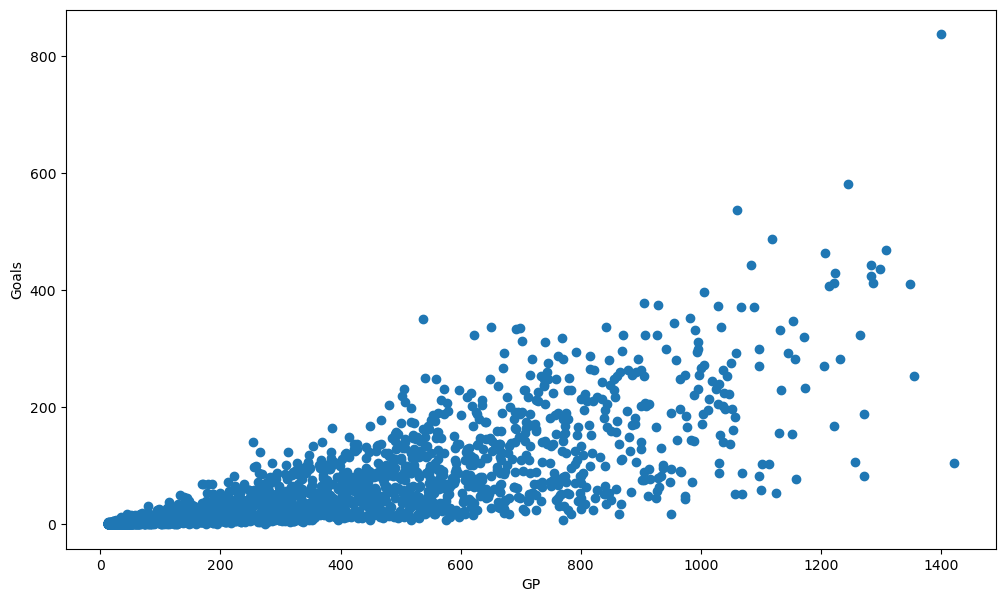

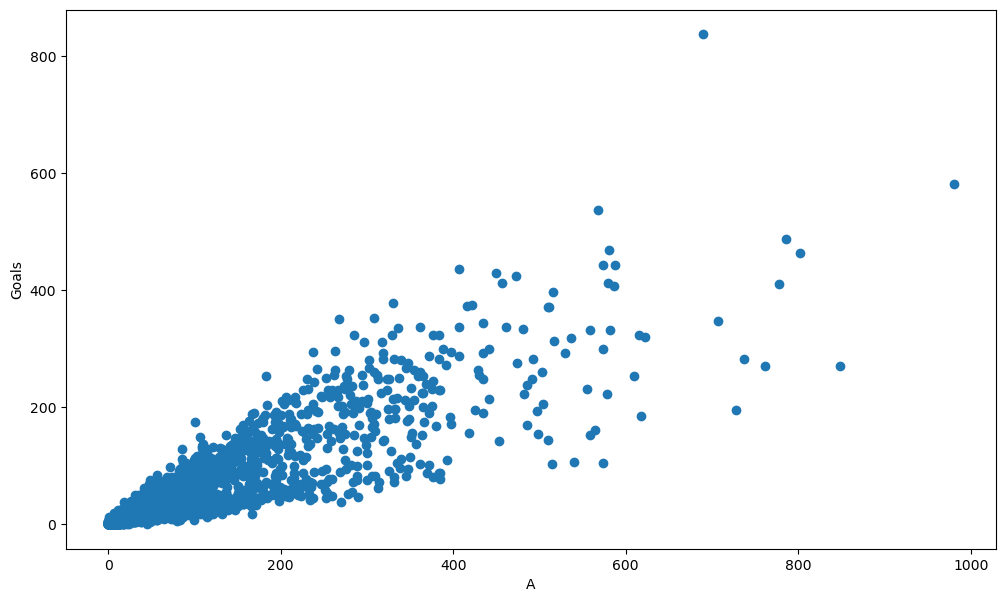

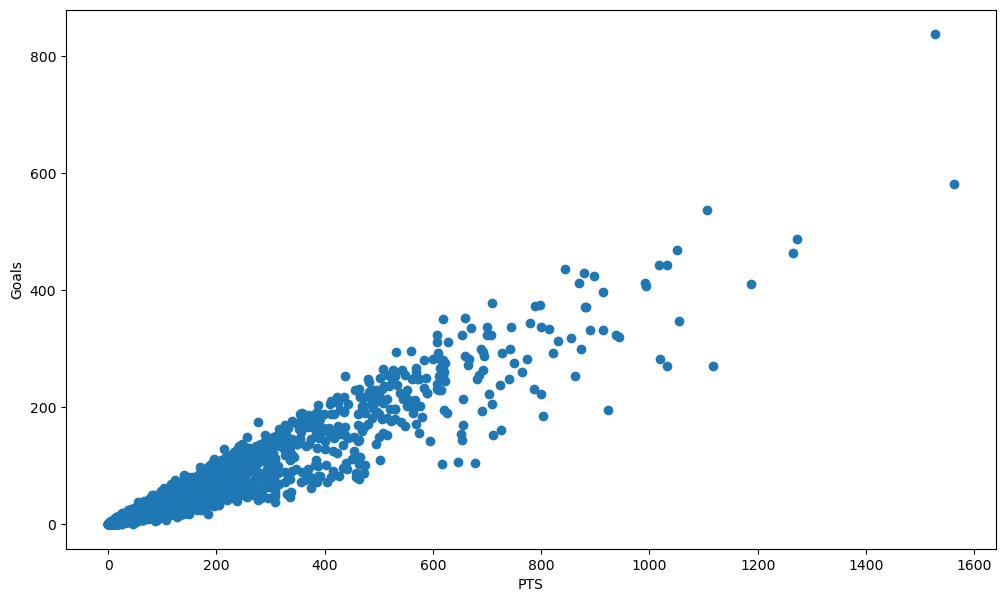

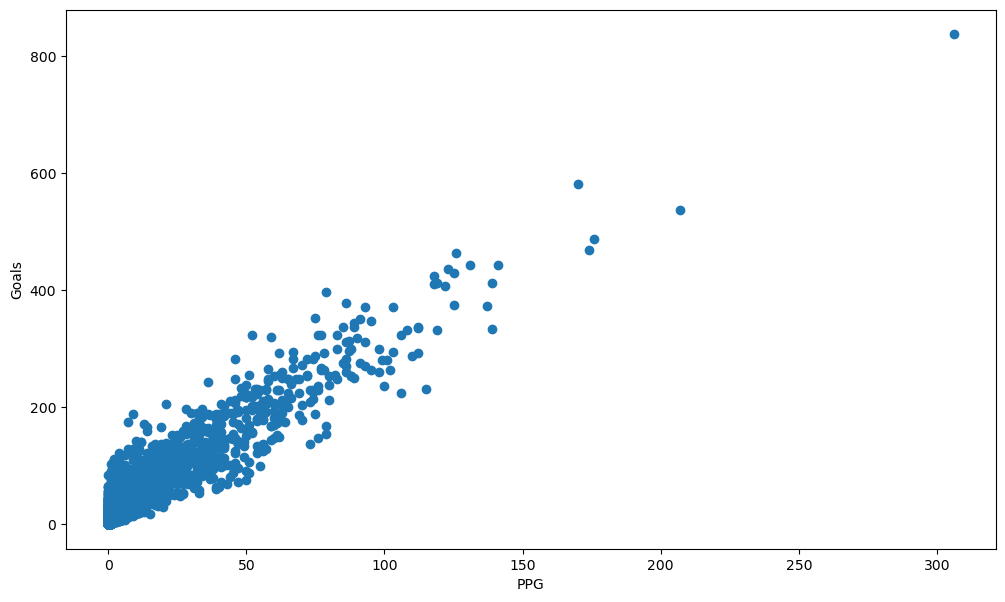

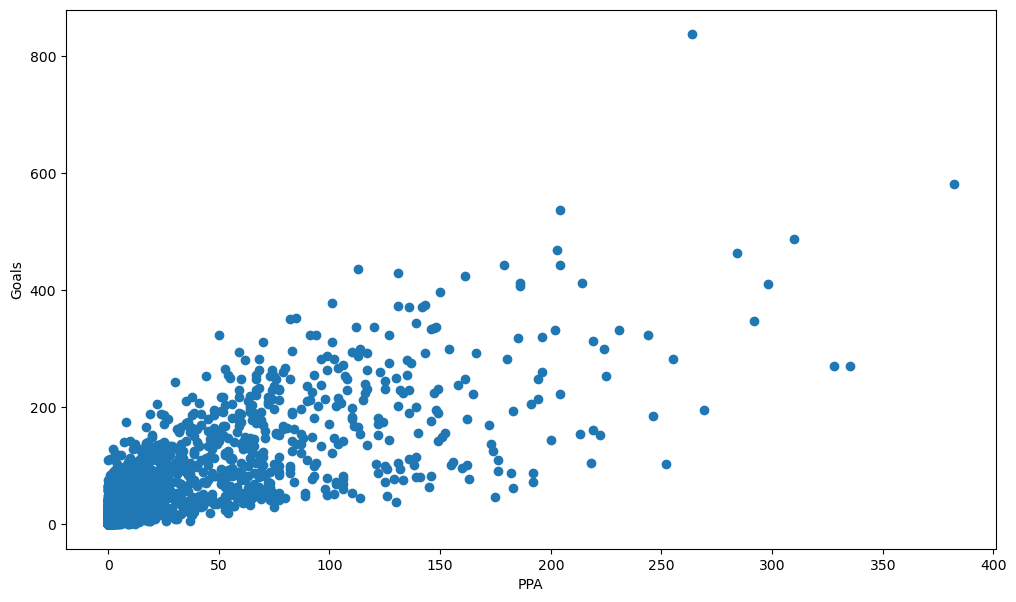

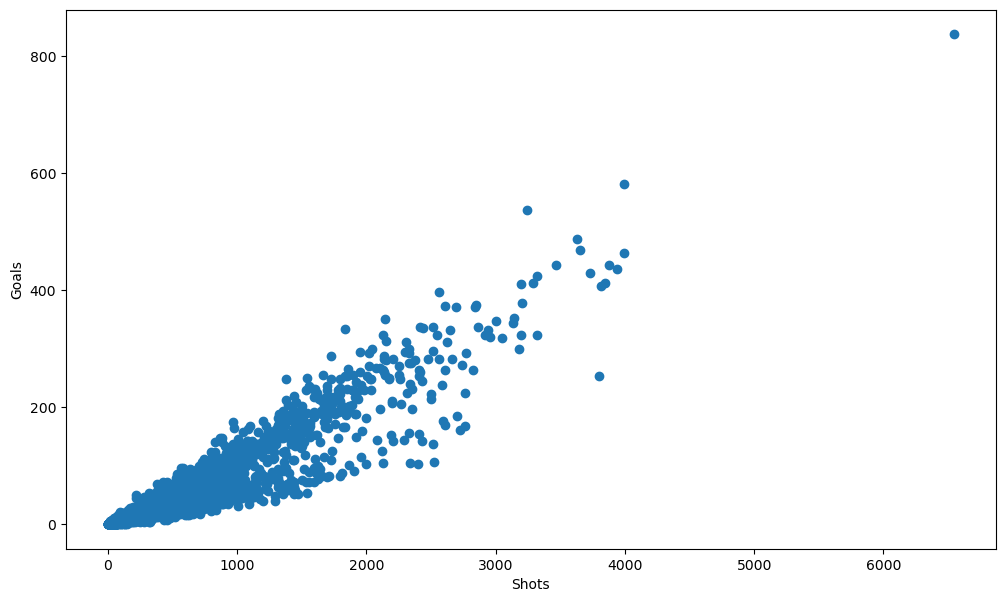

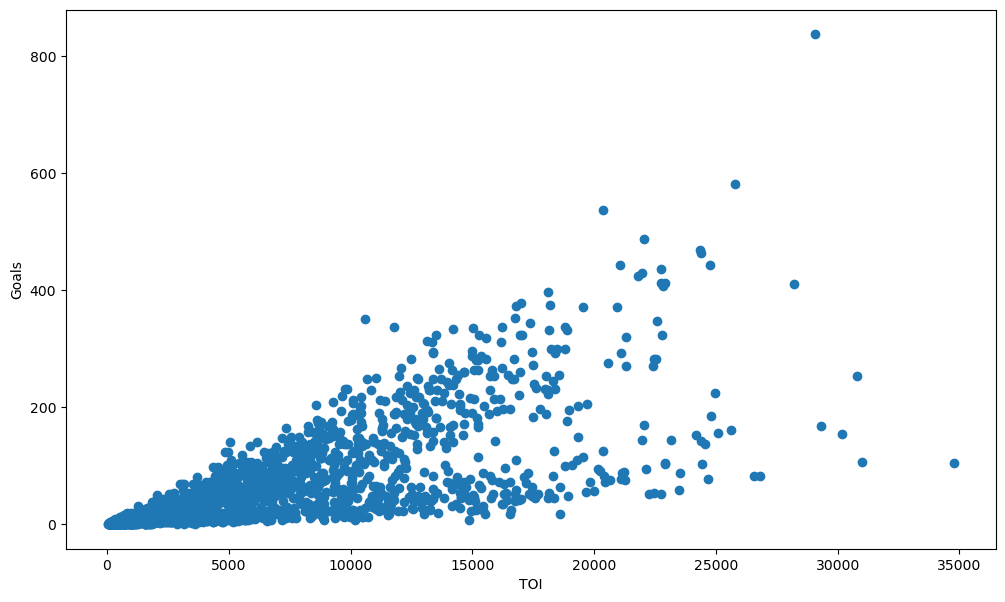

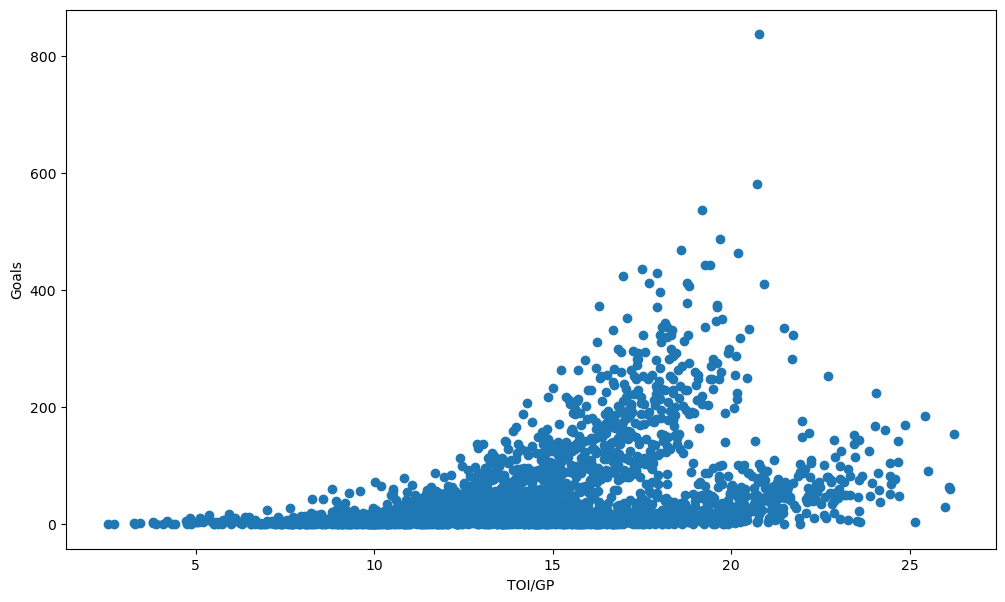

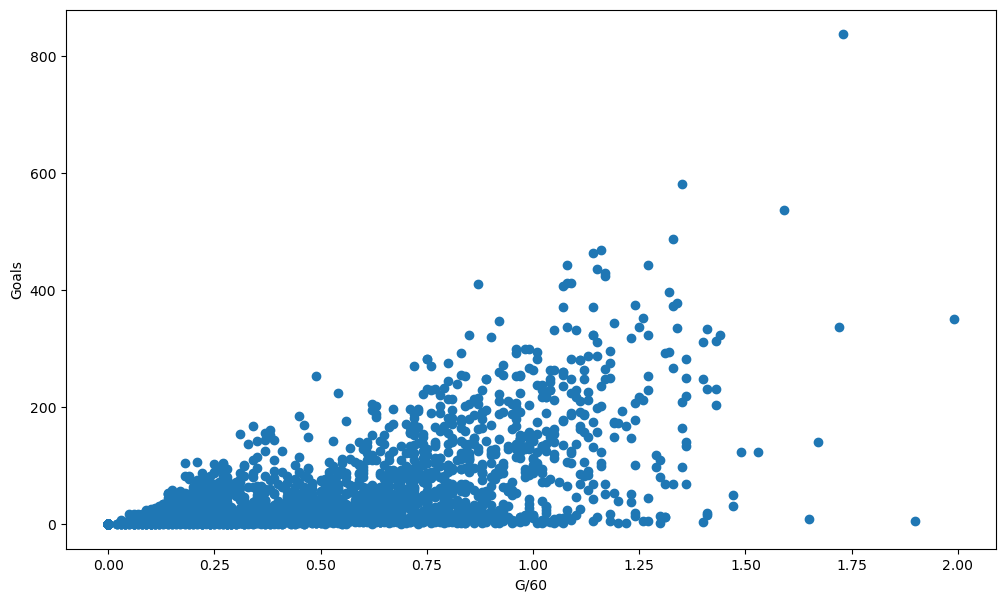

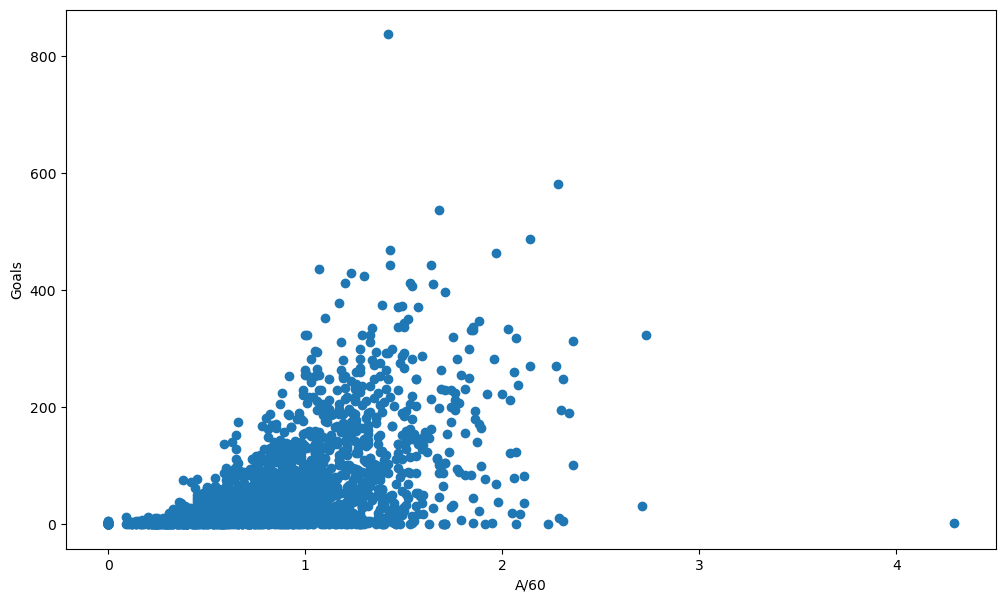

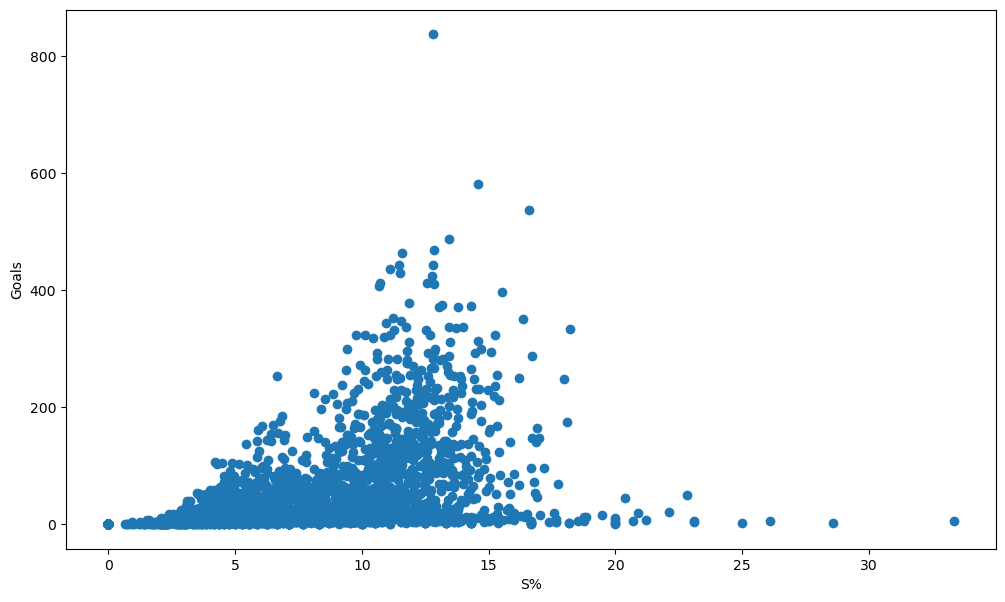

In [30]:
# using a loop to plot all independent variables against our dependent
for col in X.columns: 
    plt.figure(figsize=(12,7))
    plt.scatter(X[col], y)
    plt.ylabel('Goals')
    plt.xlabel(col)
    plt.show()

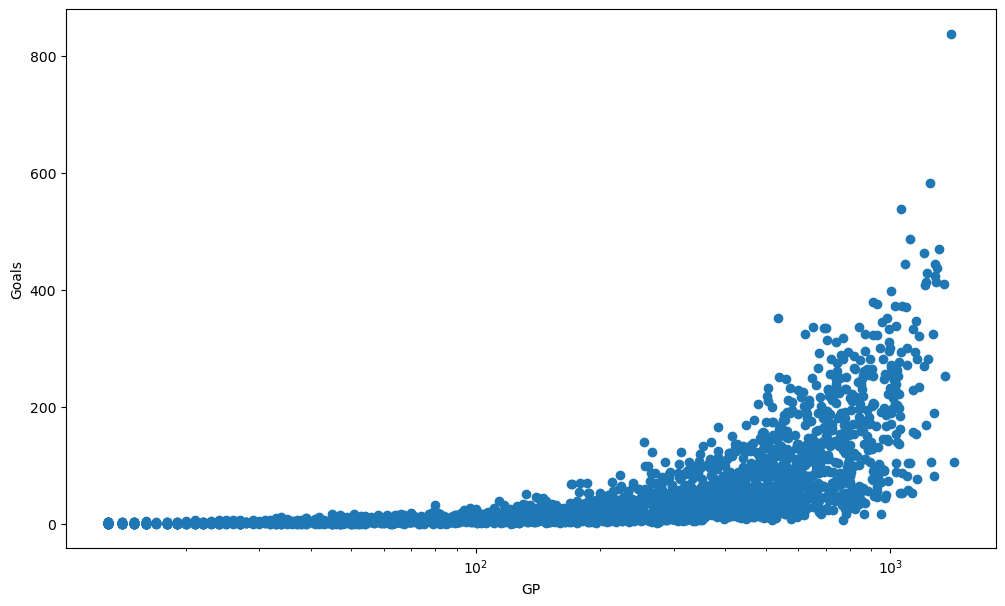

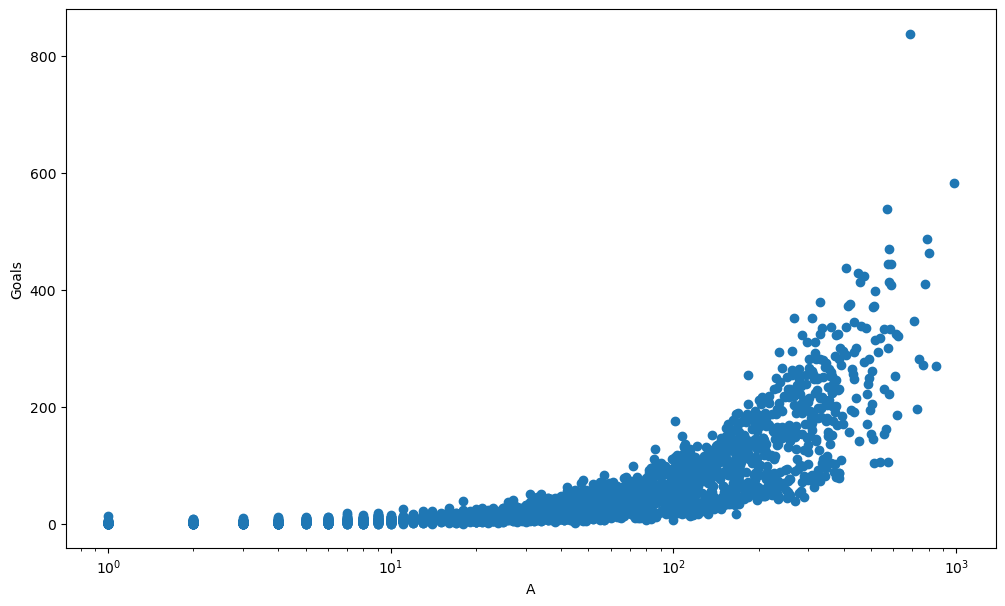

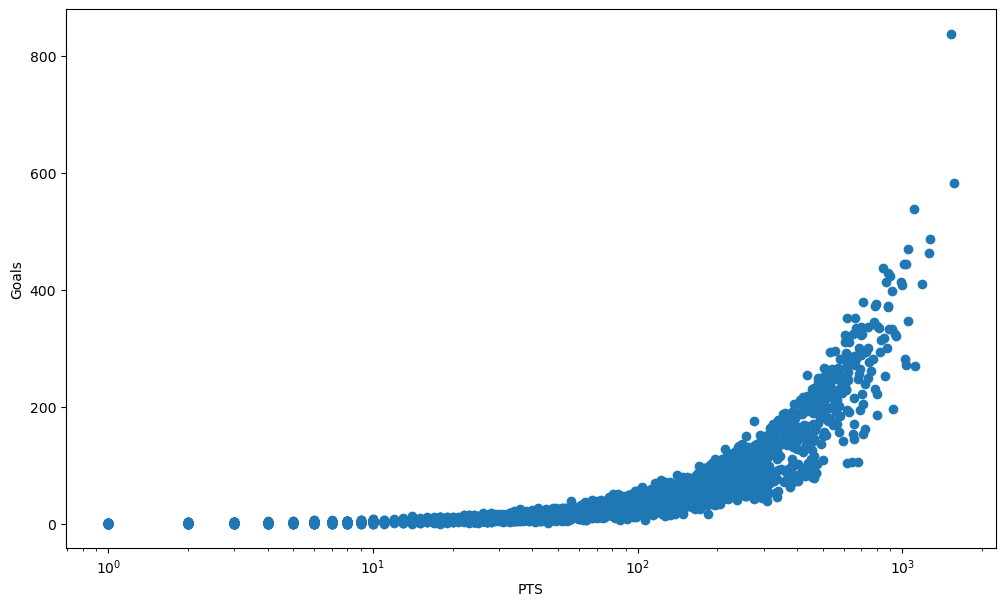

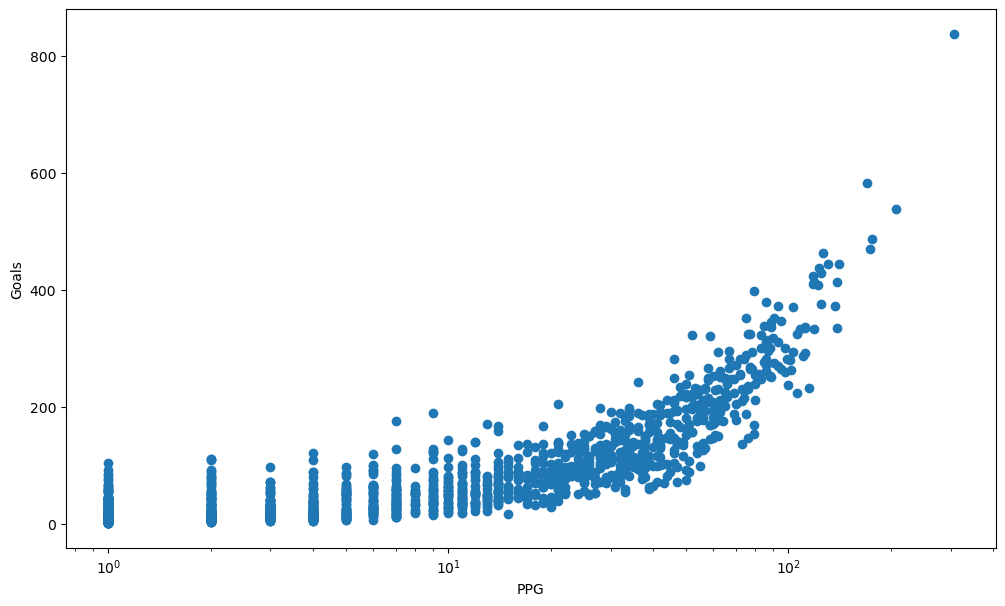

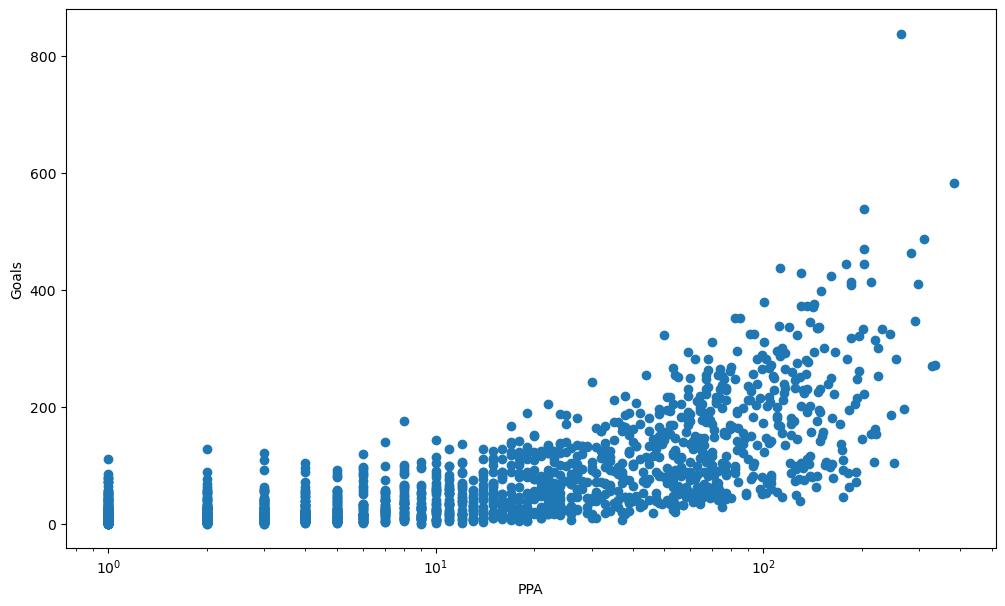

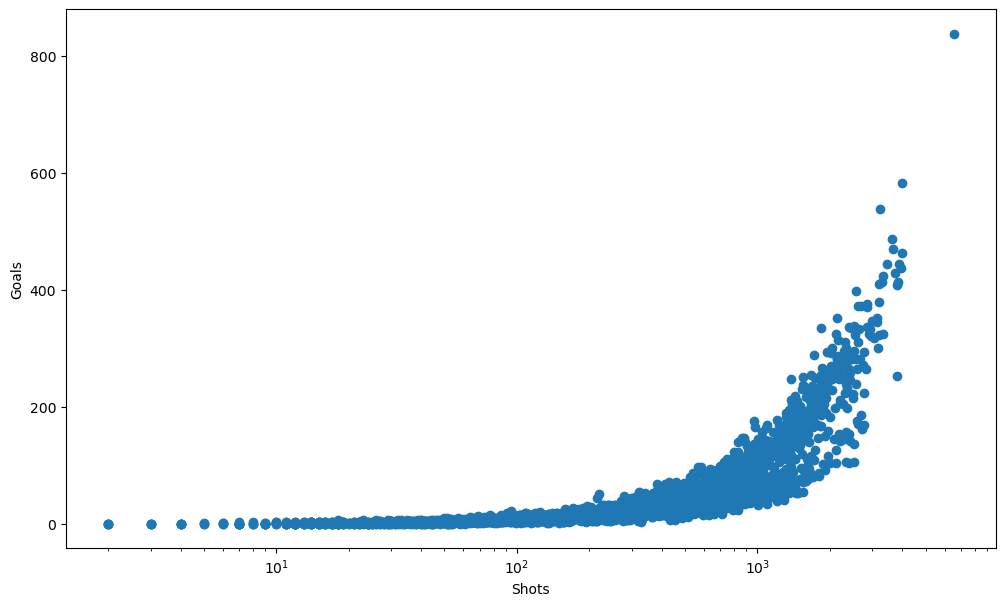

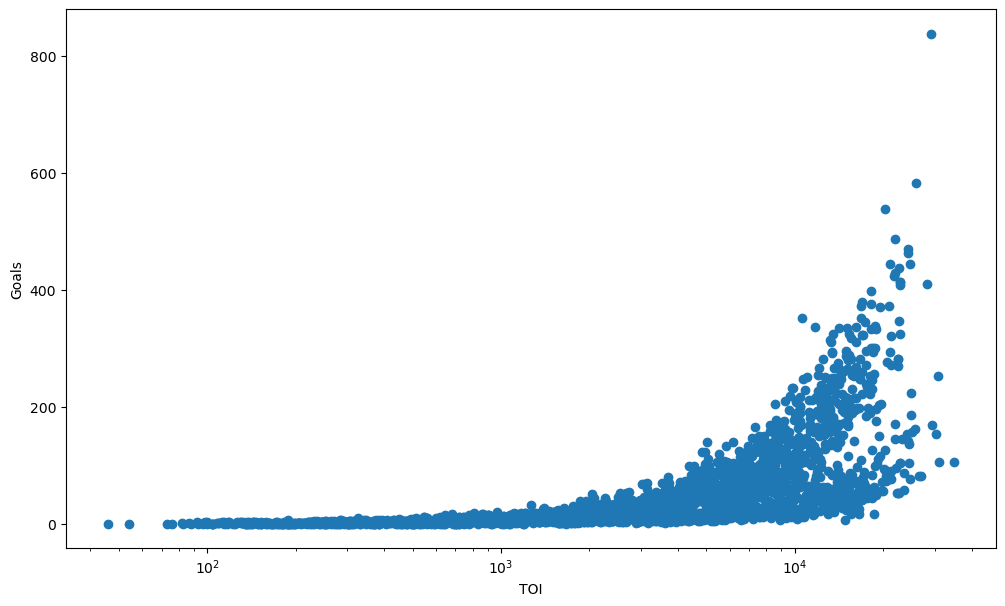

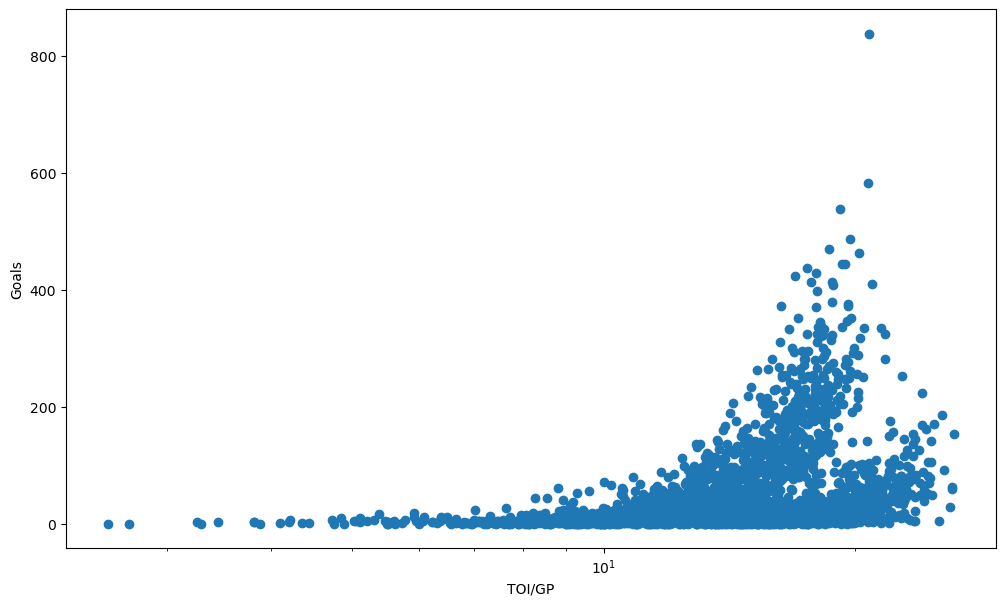

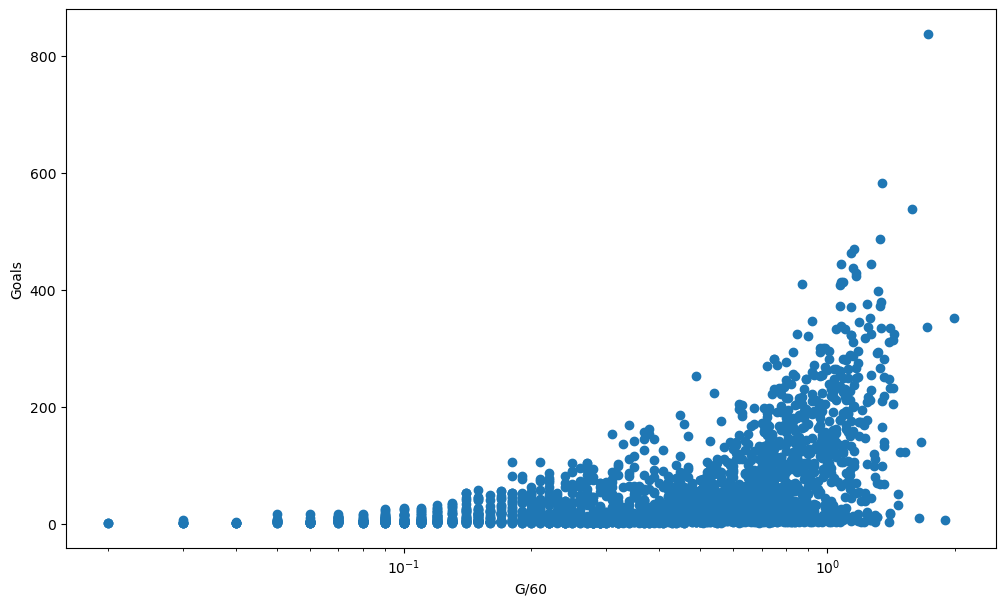

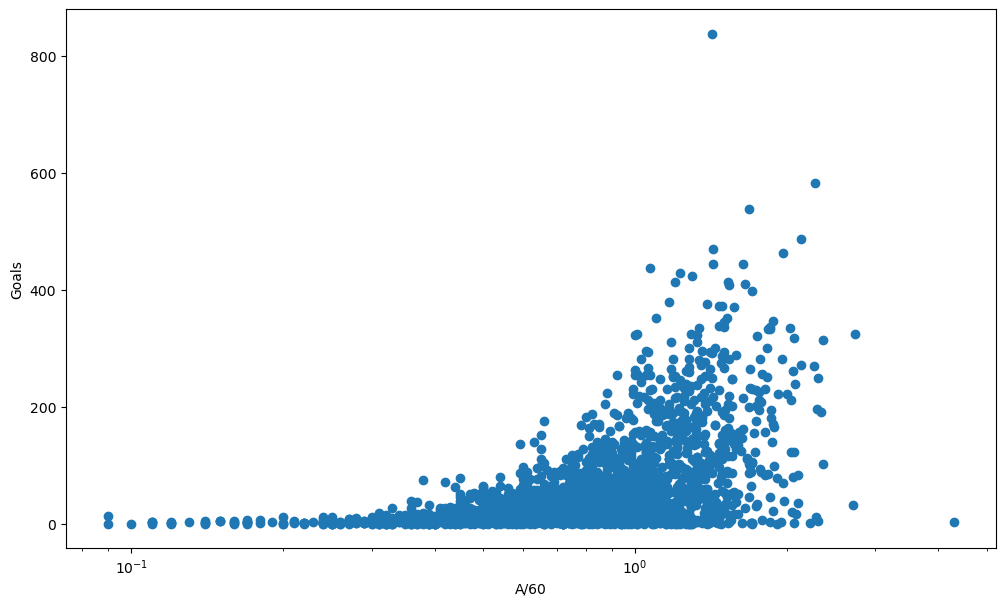

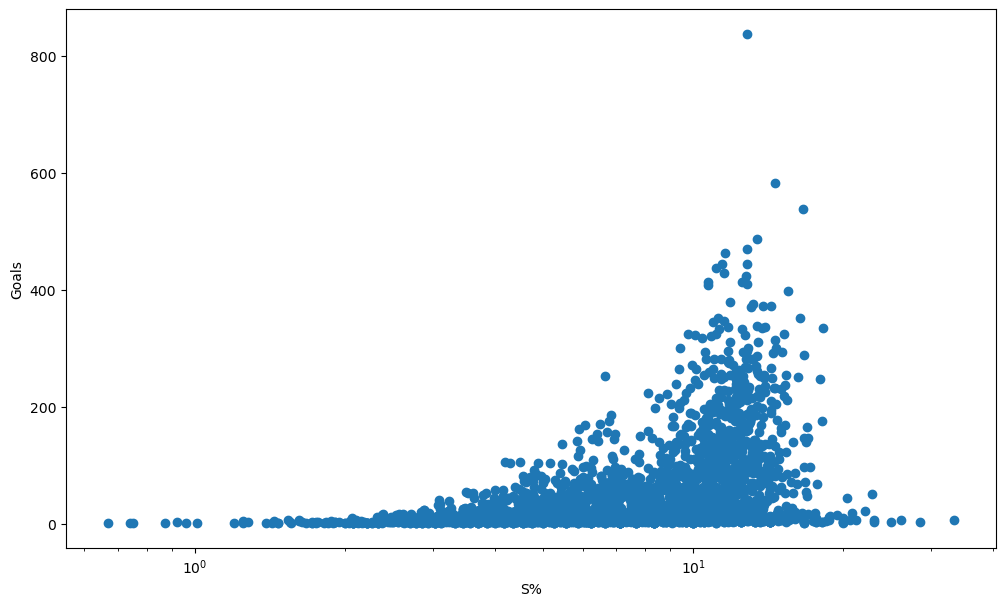

In [36]:
for col in X.columns:
    plt.figure(figsize=(12,7))
    plt.scatter(X[col], y)
    plt.ylabel('Goals')
    plt.xlabel(col)
    plt.xscale('log')  # Set x-axis to logarithmic scale
    plt.show()

In [31]:
# modelling time

X_withconstant = sm.add_constant(X)
lm_nhl_careertotals = sm.OLS(y,X_withconstant)
lm_nhl_careertotals_results = lm_nhl_careertotals.fit()
lm_nhl_careertotals_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      G   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.701e+31
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:14:40   Log-Likelihood:                 68699.
No. Observations:                2499   AIC:                        -1.374e+05
Df Residuals:                    2487   BIC:                        -1.373e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.105e-14   3.31e-14      2.149      0.032    6.21e-15    1.36e-13
GP          2.331e-15   1.17e-16     19.932      0.000     2.1e-15    2.56e-15
A             -1.0000   8.09e-16  -1.24e+15      0.000      -1.000      -1.000
PTS            1.0000   5.18e-16   1.93e+15      0.000       1.000       1.000
PPG        -8.327e-16      1e-15     -0.830      0.407    -2.8e-15    1.14e-15
PPA         1.943e-16   6.45e-16      0.301      0.763   -1.07e-15    1.46e-15
Shots      -1.254e-15    5.2e-17    -24.133      0.000   -1.36e-15   -1.15e-15
TOI        -1.251e-16   7.94e-18    -15.763      0.000   -1.41e-16    -1.1e-16
TOI/GP      1.943e-15   2.28e-15      0.851      0.395   -2.54e-15    6.42e-15
G/60        7.638e-14   4.87e-14      1.569      0.117   -1.91e-14    1.72e-13
A/60       -2.731e-14   2.19e-14     -1.249      0.212   -7.02e-14    1.56e-14
S%         -3.941e-15   3.19e-15     -1.236      0.216   -1.02e-14    2.31e-15
==============================================================================
Omnibus:                      713.859   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21798.885
Skew:                           0.714   Prob(JB):                         0.00
Kurtosis:                      17.398   Cond. No.                     6.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X.corr()

,GP,A,PTS,PPG,PPA,Shots,TOI,TOI/GP,G/60,A/60,S%
GP,1.000000,0.861581,0.856475,0.680155,0.697875,0.902615,0.968344,0.530673,0.281753,0.352843,0.204258
A,0.861581,1.000000,0.981603,0.848139,0.941457,0.928501,0.895163,0.566035,0.394772,0.587640,0.283130
PTS,0.856475,0.981603,1.000000,0.909942,0.907491,0.960323,0.865899,0.510613,0.494810,0.590524,0.354231
PPG,0.680155,0.848139,0.909942,1.000000,0.833804,0.876637,0.695712,0.410221,0.556922,0.548878,0.379902
PPA,0.697875,0.941457,0.907491,0.833804,1.000000,0.824365,0.767371,0.534658,0.359836,0.598564,0.248760
Shots,0.902615,0.928501,0.960323,0.876637,0.824365,1.000000,0.901015,0.514325,0.464004,0.491430,0.290301
TOI,0.968344,0.895163,0.865899,0.695712,0.767371,0.901015,1.000000,0.649917,0.219206,0.365544,0.145759
TOI/GP,0.530673,0.566035,0.510613,0.410221,0.534658,0.514325,0.649917,1.000000,-0.007381,0.329096,-0.037581
G/60,0.281753,0.394772,0.494810,0.556922,0.359836,0.464004,0.219206,-0.007381,1.000000,0.564141,0.873445
A/60,0.352843,0.587640,0.590524,0.548878,0.598564,0.491430,0.365544,0.329096,0.564141,1.000000,0.450982


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


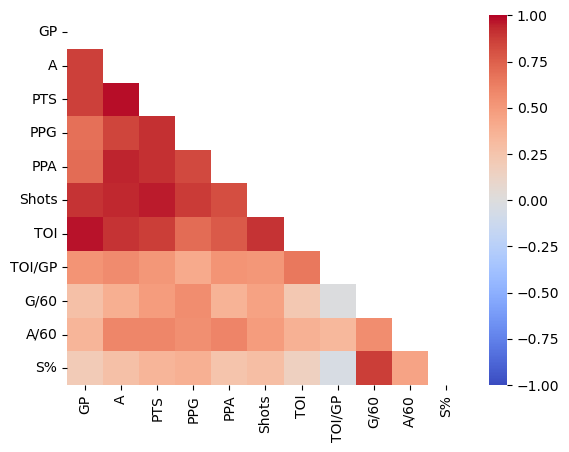

In [37]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure()
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [72]:
X.corr()

,GP,A,PTS,PPG,PPA,Shots,TOI,TOI/GP,G/60,A/60,S%
GP,1.000000,0.861581,0.856475,0.680155,0.697875,0.902615,0.968344,0.530673,0.281753,0.352843,0.204258
A,0.861581,1.000000,0.981603,0.848139,0.941457,0.928501,0.895163,0.566035,0.394772,0.587640,0.283130
PTS,0.856475,0.981603,1.000000,0.909942,0.907491,0.960323,0.865899,0.510613,0.494810,0.590524,0.354231
PPG,0.680155,0.848139,0.909942,1.000000,0.833804,0.876637,0.695712,0.410221,0.556922,0.548878,0.379902
PPA,0.697875,0.941457,0.907491,0.833804,1.000000,0.824365,0.767371,0.534658,0.359836,0.598564,0.248760
Shots,0.902615,0.928501,0.960323,0.876637,0.824365,1.000000,0.901015,0.514325,0.464004,0.491430,0.290301
TOI,0.968344,0.895163,0.865899,0.695712,0.767371,0.901015,1.000000,0.649917,0.219206,0.365544,0.145759
TOI/GP,0.530673,0.566035,0.510613,0.410221,0.534658,0.514325,0.649917,1.000000,-0.007381,0.329096,-0.037581
G/60,0.281753,0.394772,0.494810,0.556922,0.359836,0.464004,0.219206,-0.007381,1.000000,0.564141,0.873445
A/60,0.352843,0.587640,0.590524,0.548878,0.598564,0.491430,0.365544,0.329096,0.564141,1.000000,0.450982


In [ ]:
# This is how we can look at the mean of a particular player's stats
# new_nhl_df.groupby('Player').mean(numeric_only=True).round(2).sort_values(by='PTS', ascending=False).head(30)

In [ ]:
# grouping by player and summing their stats
# nhl_df.groupby('Player').sum(numeric_only=True).sort_values(by='PTS/g', ascending=False).head(30)

# grouping by player  and taking the average of their stats
# nhl_df.groupby('Player').mean(numeric_only=True).round(2).sort_values(by='PTS/g', ascending=False).head(30)

# grouping by player and summing their stats....ordered by total points
# new_nhl_df.groupby('Player').sum(numeric_only=True).sort_values(by='PTS', ascending=False).head(30)

<function matplotlib.pyplot.show(close=None, block=None)>

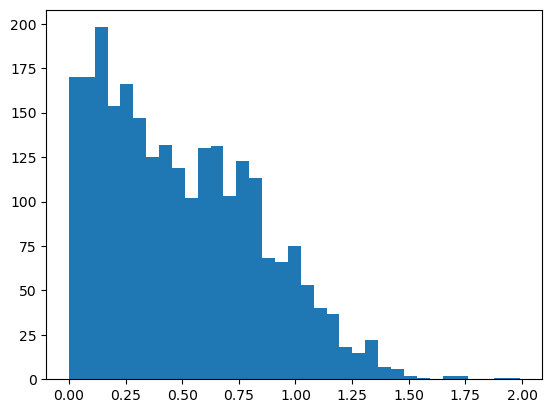

In [36]:
plt.figure()
plt.hist(x=nhl_careertotals['G/60'], bins=35)
plt.show

In [ ]:
nhl_df.shape[0]

In [ ]:
# average age across dataset
round(nhl_df['Age'].sum() / nhl_df.shape[0], 2)